### Обробка та аналіз БМД, лабораторна №8
Гулякевич Анна БС-83

# Завдання
1) Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).
2) Побудувати графік розкиду в групах.
3) Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.
4) Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.
5) Перевірити результат роботи функції на реальних або сгенерованих даних. Зробити висновок.

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Дослідження буде стосуватись кількості лабораторних досліджень трьох країн для винайденя вакцини проти вірусу по країнам на проміжку 4х місяців. 

In [2]:
col1 = [30, 20, 21, 27]
col2 = [45, 70, 10, 60]
col3 = [11, 14, 22, 26]
col = ["Січень", "Лютий", "Березень", "Квітень"]
data = pd.DataFrame({"Китай": col1, "Америка": col2, "Німеччина": col3}, index = col)
data

,Китай,Америка,Німеччина
Січень,30,45,11
Лютий,20,70,14
Березень,21,10,22
Квітень,27,60,26


In [3]:
av1 = round((data['Китай'].mean()), 2)
av2 = round((data['Америка'].mean()), 2)
av3 = round((data['Німеччина'].mean()), 2)
sd1 = round((data['Китай'].std()), 2)
sd2 = round((data['Америка'].std()), 2)
sd3 = round((data['Німеччина'].std()), 2)

df = pd.DataFrame({"Китай": col1, "Америка": col2, "Німеччина": col3}, index = col)
df.loc["Середнє:"] = [av1, av2, av3]
df.loc["Стандартне відхилення:"] = [sd1,sd2,sd3]
df

,Китай,Америка,Німеччина
Січень,30.0,45.00,11.00
Лютий,20.0,70.00,14.00
Березень,21.0,10.00,22.00
Квітень,27.0,60.00,26.00
Середнє:,24.5,46.25,18.25
Стандартне відхилення:,4.8,26.26,6.95


Побудувати графік розкиду в групах

[]

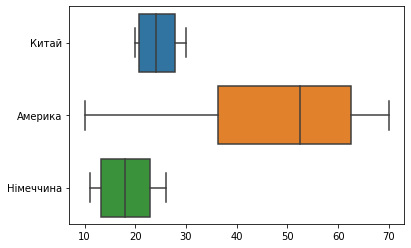

In [4]:
sns.boxplot(data=data, orient='h').set()

Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.

In [5]:
def Dispersion(data):
    c = len(data.iloc[0,:])
    n = data.shape[0]
    Tc = 0
    Tc2 = 0
    sum1 = 0
    for i in range(c):
        Tc = data.iloc[:, i].sum()
        sum1 += Tc
        Tc2 += (Tc)**2
    N = n*3
    sum1 = sum1**2
    sum2 = 0
    
    for i in range (c):
        for j in range(len(data.iloc[:, i-1])):
            sum2 += (data.iloc[j][i])**2

    const = sum1 / N
    
    SSfact = Tc2/n - const
    SSzag = sum2 - const
    SSvyp = SSzag - SSfact
    
    dfact = c - 1
    dzag = N - 1
    dvyp = dzag - dfact
    
    MSfact = SSfact / dfact
    MSvyp = SSvyp / dvyp

    Fempir = MSfact / MSvyp

    
    if((dvyp >= 24) and (dvyp < 26)):
        dvyp = 24
    elif((dvyp >= 26) and (dvyp < 28)):
        dvyp = 26
    elif((dvyp >= 28) and (dvyp < 30)):
        dvyp = 28
    elif((dvyp >= 30) and (dvyp < 40)):
        dvyp = 30
    elif((dvyp >= 40) and (dvyp < 60)):
        dvyp = 40
    elif((dvyp >= 60) and (dvyp <= 120)):
        dvyp = 60
    elif((dvyp >=  120) and (dvyp <=  130)):
        dvyp = 120
    elif(dvyp > 130):
        dvyp = ">130"
    
    if((n >= 10) and (n < 15)):
        dfact  = 10
    elif((n >= 15) and (n < 20)):
        dfact  = 15
    elif((n >= 20) and (n < 30)):
        dfact  = 20
    elif((n >= 30) and (n <= 40)):
        dfact  = 30
    elif(n > 40):
        dfact  = ">40"
    critical_table = pd.read_excel('D:\бмд\BMDlabs\laba 8\таблица1.xlsx', index_col = 0)
    critical_table = critical_table[dvyp][dfact]
    if(Fempir >= critical_table):
        result = "Нульова гіпотеза про рівність середніх відхиляється, рівність середніх не підтверджена"
    else:
        result = "Нульова гіпотеза про рівність середніх приймається, рівність середніх підтверджена"
    table = pd.DataFrame({
        "Характеристика" : ['Внутрішньогрупова дисперсія ($SS_{факт}$)','Загальногрупова дисперсія ($SS_{заг}$)', 'Випадкова (залишкова) величина $SS_{вип}$',
                           'Kількість ступенів свободи: $d_{факт} = c - 1:$' ,'Kількість ступенів свободи: $d_{заг} = N - 1 :$' , 'Kількість ступенів свободи: $d_{вип}$', '$MS_{факт}: $', '$MS_{вип}: $',
                           'Значення $F_{емпір}$: ','Kритичне значення $F_{крит}$:', "Результат"],
        "Обчислене значення" : [ str(round(SSfact,2)) , str(round(SSzag,2)) ,str(round(SSvyp,2)),str(dfact),str(dzag), str(dvyp), str(round(MSfact,2)),str(round(MSvyp,2)),str(round(Fempir,2)), str(critical_table), result]
    }) 
    return table

Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.

In [6]:
Dispersion(data)

,Характеристика,Обчислене значення
0,Внутрішньогрупова дисперсія ($SS_{факт}$),1728.17
1,Загальногрупова дисперсія ($SS_{заг}$),4010.67
2,Випадкова (залишкова) величина $SS_{вип}$,2282.5
3,Kількість ступенів свободи: $d_{факт} = c - 1:$,2
4,Kількість ступенів свободи: $d_{заг} = N - 1 :$,11
5,Kількість ступенів свободи: $d_{вип}$,9
6,$MS_{факт}: $,864.08
7,$MS_{вип}: $,253.61
8,Значення $F_{емпір}$:,3.41
9,Kритичне значення $F_{крит}$:,19.38


Зробити висновок.


Висновок: Під час проведення дисперсійного аналізу був отриманий результат 𝐹емпіричне < 𝐹критичне , що свідчить про те що нульову гіпотезу про рівність середніх ми приймаємо.